In [1]:
import scipy 
import numpy as np
import torch
import matplotlib.pyplot as plt

sig = scipy.io.loadmat(r'D:\github_projects\dpd-baselines\src\dpd_baselines\data\BlackBoxData_80.mat')

In [2]:
x = sig['x'][0]
eRef = sig['eRef'][0]
y = sig['y'][0]

sig.keys(), x.shape


(dict_keys(['__header__', '__version__', '__globals__', 'eRef', 'x', 'y']),
 (99840,))

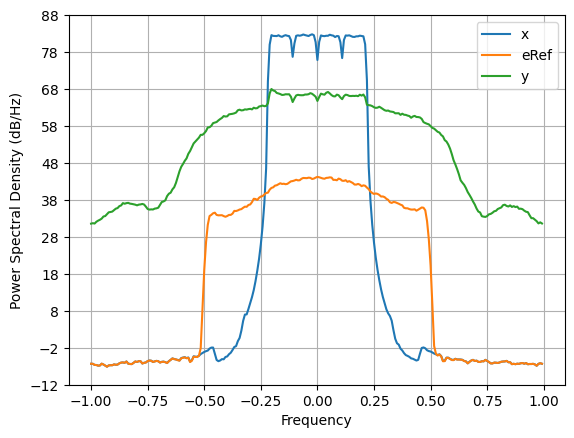

In [9]:
plt.psd(x.flatten(), label='x');
plt.psd(eRef, label='eRef');
plt.psd(y, label='y');
# plt.psd(x - y)
plt.legend()